# Feature Engineering Methods



# 1. Handling Missing Values



* **Imputation**:
  * Fill missing values with mean, median, mode or other values.

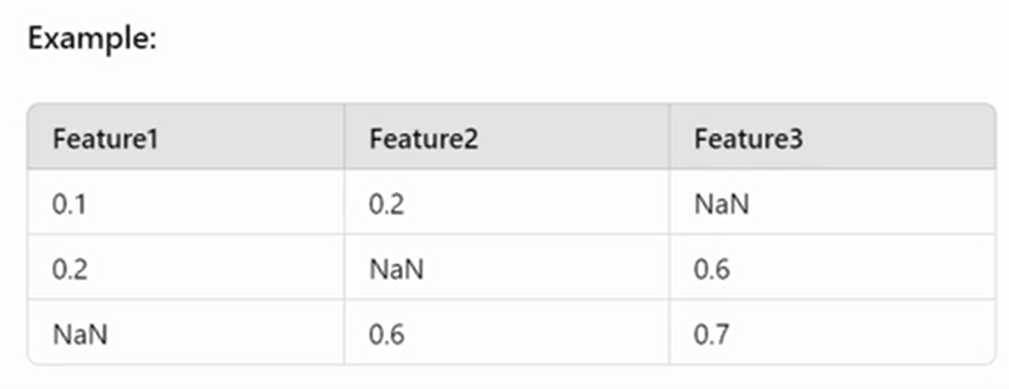

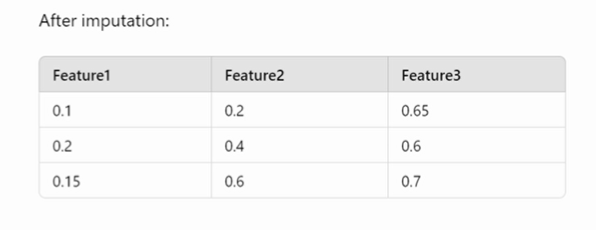

# Implementation

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Sample Data
data = {
    'Feature1' : [1.0, 2.0, None, 4.0, 5.0],
    'Feature2' : [2.0, None, 4.0, 5.0, None],
    'Feature3' : [None, 3.0, 3.5, 4.0, 4.5]
}

df = pd.DataFrame(data)

# Handle Missing Values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)
print("After imputation:\n", df_imputed)

After imputation:
    Feature1  Feature2  Feature3
0       1.0  2.000000      3.75
1       2.0  3.666667      3.00
2       3.0  4.000000      3.50
3       4.0  5.000000      4.00
4       5.0  3.666667      4.50


In [3]:
df

,Feature1,Feature2,Feature3
0,1.0,2.0,NaN
1,2.0,NaN,3.0
2,NaN,4.0,3.5
3,4.0,5.0,4.0
4,5.0,NaN,4.5


# 2. Encoding Categorical Variables



*   One-Hot Encoding:
    * Convert categorical variables into a series of binary columns.




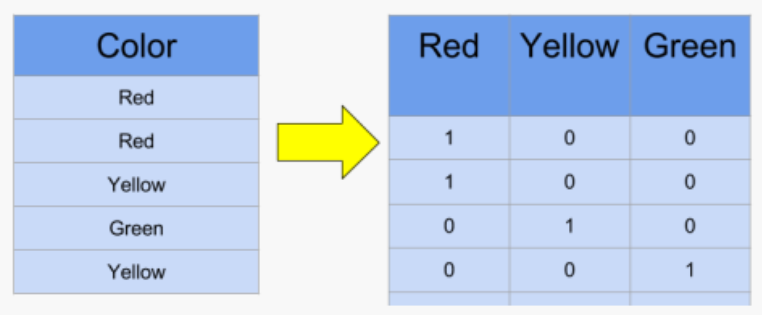

# Implementation

In [4]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Sample Data
data = {
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red']
}
df = pd.DataFrame(data)

# Encoding categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_categories = encoder.fit_transform(df[['Color']])
df_encoded = pd.DataFrame(encoded_categories, columns = encoder.get_feature_names_out(['Color']))
df = pd.concat([df, df_encoded], axis = 1).drop('Color', axis = 1)
print('After One-Hot Encoding:\n', df)

After One-Hot Encoding:
    Color_Blue  Color_Green  Color_Red
0         0.0          0.0        1.0
1         1.0          0.0        0.0
2         0.0          1.0        0.0
3         1.0          0.0        0.0
4         0.0          0.0        1.0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# 3. Feature Scaling

Definition:

Feature scaling involves normalizing or standardizing features so that they have a similar scale.Common methods include min-max scaling and standardization (z - score normalization).


*   Min-Max Scaling:
    *  Scale Features to a fixed range, typically [0,1].



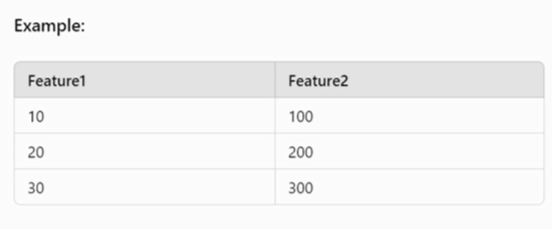

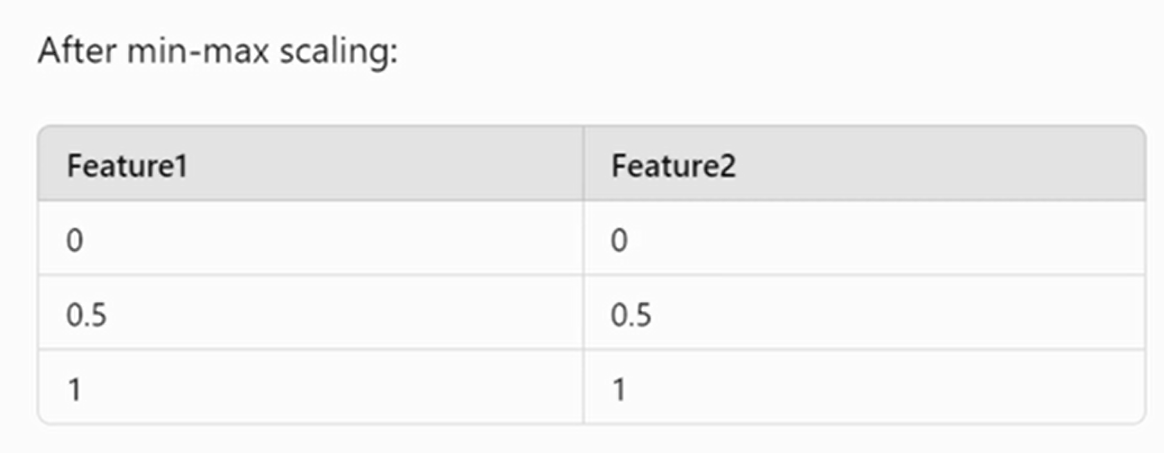



*  It is done by using formula of normalization.




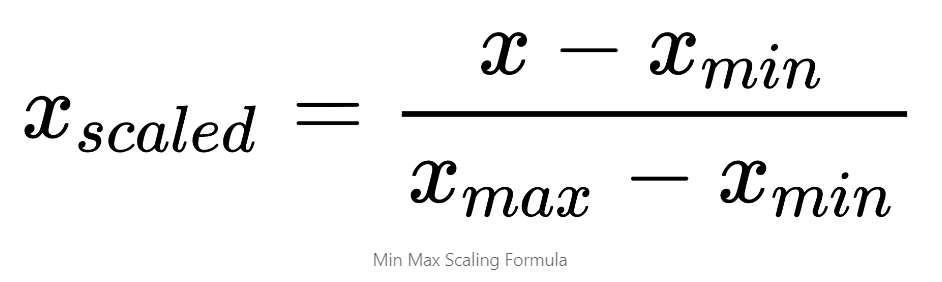

# Implementation

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample Data
data = {
    'Feature1' : [10, 20, 30, 40, 50],
    'Feature2' : [100, 200, 300, 400, 500]
}
df = pd.DataFrame(data)
# Feature Scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
print("After min max scaling:\n", df_scaled)

After min max scaling:
    Feature1  Feature2
0      0.00      0.00
1      0.25      0.25
2      0.50      0.50
3      0.75      0.75
4      1.00      1.00


# 4. Feature Creation


* Polynomial Features:
    * Create new features by taking polynomial combinations of existing features.

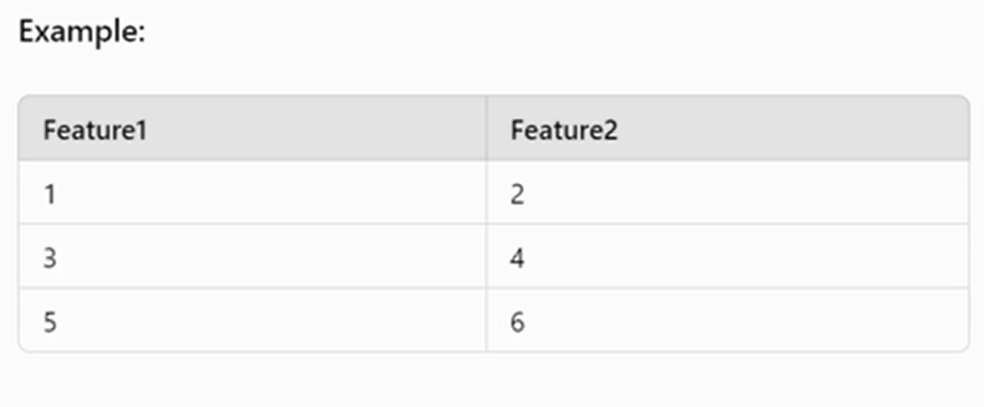

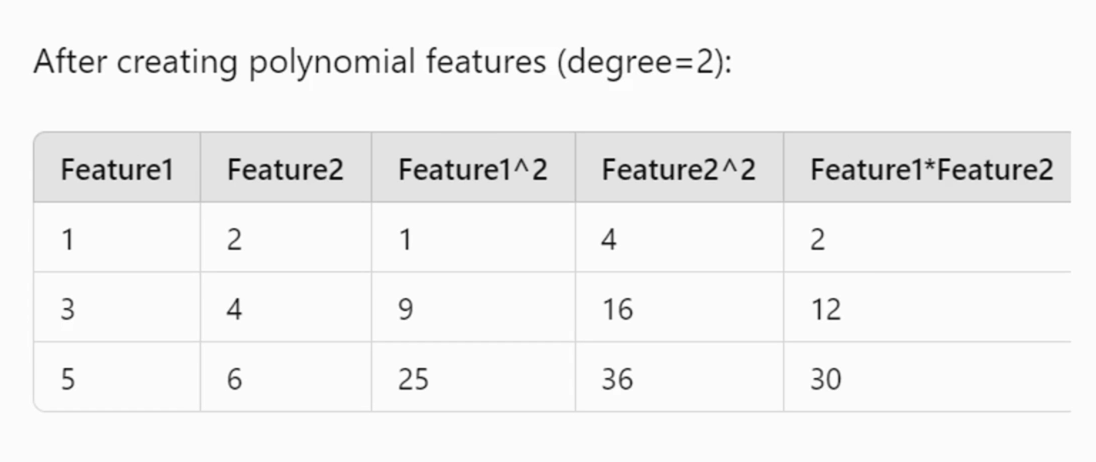

# Implementation

In [6]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Sample Data
data = {
    'Feature1': [1,2,3,4,5],
    'Feature2': [2,3,4,5,6]
}
df = pd.DataFrame(data)

# Feature Creation
poly = PolynomialFeatures(degree=2, include_bias = False)
poly_features = poly.fit_transform(df)
df_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['Feature1', 'Feature2']))

# Print the resulting DataFrame
print("After creating polynomial features:\n", df_poly)

After creating polynomial features:
    Feature1  Feature2  Feature1^2  Feature1 Feature2  Feature2^2
0       1.0       2.0         1.0                2.0         4.0
1       2.0       3.0         4.0                6.0         9.0
2       3.0       4.0         9.0               12.0        16.0
3       4.0       5.0        16.0               20.0        25.0
4       5.0       6.0        25.0               30.0        36.0


# Feature Selection Methods

**Definition**:
   
   Feature selection is a way of selecting the subset of the most relevant features from the original features set by removing the redundant, irrelevant, or noisy features.



# 1. Variance Thresholding

**Definition**:

Variance Thresholding is a simple baseline approach to feature selection. It removes all features whose variance doesn't meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

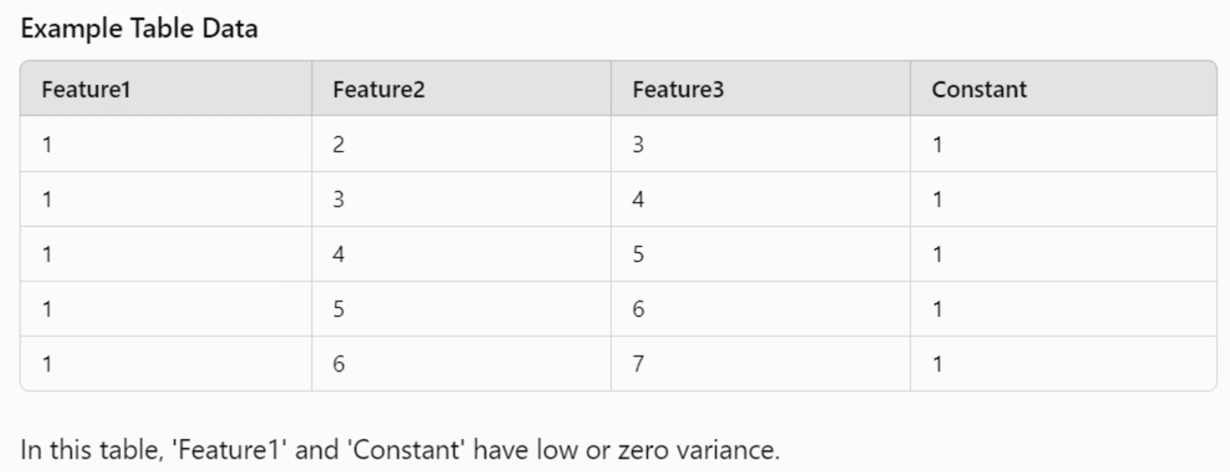

In [7]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Sample Data
data = {
    'Feature1' : [1, 1, 1, 1, 1],     # Low Variance
    'Feature2' : [2, 3, 4, 5, 6],
    'Feature3' : [3, 4, 5, 6, 7],
    'Constant' : [1, 1, 1, 1, 1]      # Zero Variance
}

df = pd.DataFrame(data)

# Variance Thresholding
selector = VarianceThreshold(threshold=0.1)
df_variance_filtered = pd.DataFrame(selector.fit_transform(df), columns=df.columns[selector.get_support(1)])

print("After variance thresholding: \n", df_variance_filtered)

After variance thresholding: 
    Feature2  Feature3
0         2         3
1         3         4
2         4         5
3         5         6
4         6         7


# 2. Correlation Matrix Filtering

**Definition**:
Correlation Matrix Fltering involves computing the correlation matrix for the features in the dataset and removing one of each pair of features with a high correlation. This helps to reduce redundancy in the data.

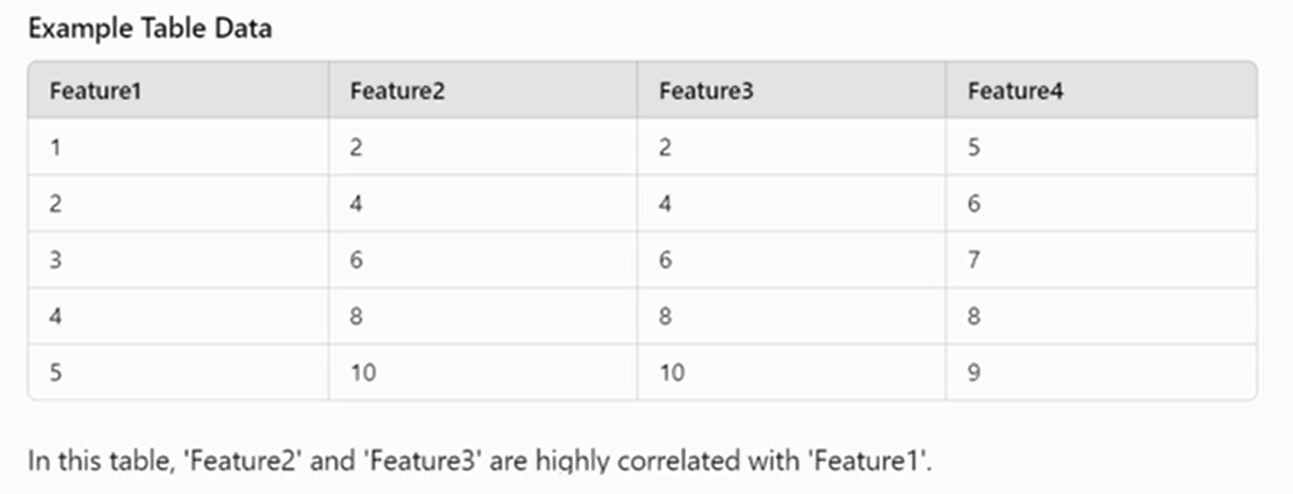

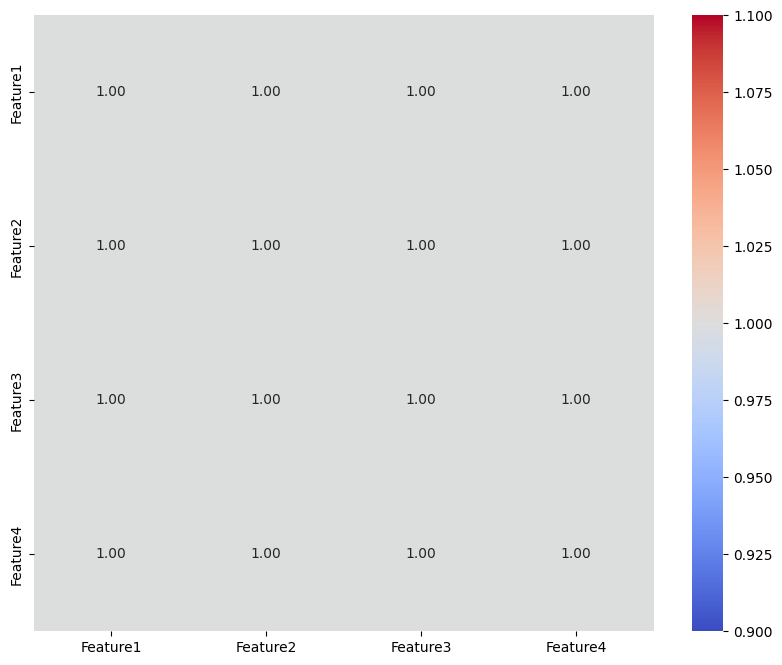

After correlation matrix filtering    Feature1
0         1
1         2
2         3
3         4
4         5


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data
data = {
    'Feature1' : [1, 2, 3, 4, 5],     # Low Variance
    'Feature2' : [2, 4, 6, 8, 10],
    'Feature3' : [2, 4, 6, 8, 10],
    'Feature4' : [5, 6, 7, 8, 9]      # Zero Variance
}

df = pd.DataFrame(data)

# Correlation Matrix
corr_matrix = df.corr().abs()

# Plot correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop features
df_corr_filtered = df.drop(to_drop, axis=1)
print("After correlation matrix filtering", df_corr_filtered)


# 3. Domain Knowledge

Domain Knowledge involves using expertise from the specific field or industry to manually select the most relevant features. This method leverages human understanding of which features are likely to be important.

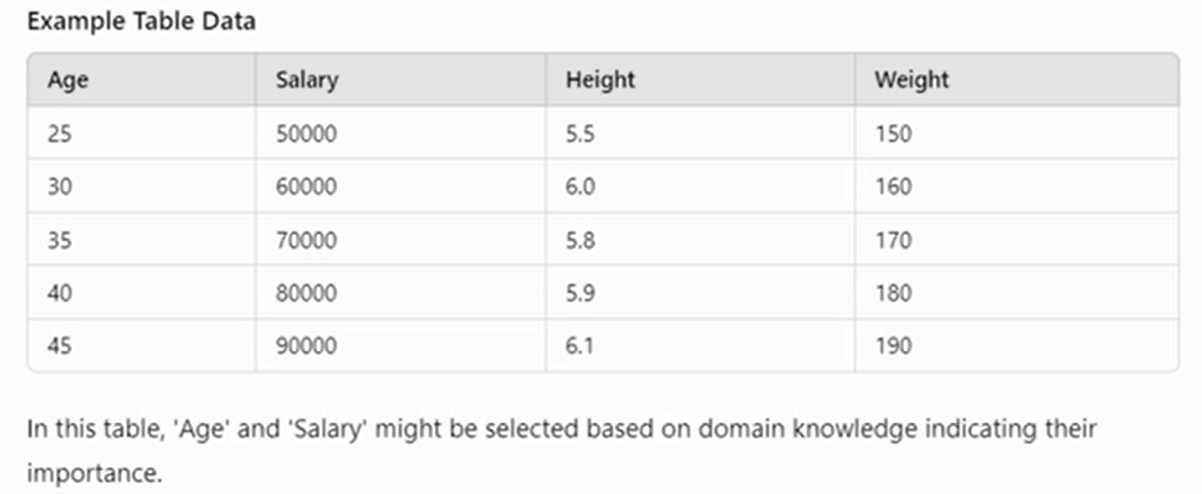

In [12]:
import pandas as pd

# Sample Data
data = {
    'Age' : [25, 30, 35, 40, 45],
    'Salary' : [50000, 60000, 70000, 80000, 90000],
    'Height' : [5.5, 6.0, 5.8, 5.9, 6.1],
    'Weight' : [150, 160, 170, 180, 190]
}

df = pd.DataFrame(data)

# based on domain knowledge, we know age and salary are important
selected_features_domain = df[['Age', 'Salary']]
print("Selected features based on Domain knowledge:\n", selected_features_domain)

Selected features based on Domain knowledge:
    Age  Salary
0   25   50000
1   30   60000
2   35   70000
3   40   80000
4   45   90000
